# 2. Modeling

### 2.0 Load Train, Val, Test (Numpy Array)

- Gray Scale : Data_gray 폴더 안에 .npy 파일이 있으면 된다.
- RGB Scale : Data 폴더 안에 .npy 파일이 있으면 된다.

#### Scale 설정
- scale = 'gray'
- scale = 'rgb'

In [1]:
scale = 'rgb'
data_dir = 'Data_class_integrate_4'
channel = 3

In [2]:
!ls {data_dir}

X_test.npy  X_train.npy  X_val.npy  y_test.npy	y_train.npy  y_val.npy


#### Load Data

In [3]:
import os
import numpy as np

if os.path.exists(data_dir):
    X_train = np.load(data_dir + '/X_train.npy')
    y_train = np.load(data_dir + '/y_train.npy')
    X_val = np.load(data_dir + '/X_val.npy')
    y_val = np.load(data_dir + '/y_val.npy')
    X_test = np.load(data_dir + '/X_test.npy')
    y_test = np.load(data_dir + '/y_test.npy')

    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)
    print(X_test.shape, y_test.shape)

(300, 64, 128, 128, 3) (300, 4)
(100, 64, 128, 128, 3) (100, 4)
(100, 64, 128, 128, 3) (100, 4)


In [4]:
X_train = X_train.astype(float) / 255
X_val = X_val.astype(float) / 255
X_test = X_test.astype(float) / 255

### 2.1 CNN + LSTM

#### 모델 이름 설정

In [5]:
model_name = 'cnn_lstm_class_integrate'

#### Parameters

In [6]:
epochs = 10
batch_size = 8

### 2.1.1 Model Define

In [7]:
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense
from keras.models import Sequential

model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation = 'relu'), input_shape = (64, 128, 128, channel)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))

model.add(TimeDistributed(Conv2D(128, (3, 3), activation = 'relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256))    
model.add(Dense(4, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 64, 126, 126, 32)  896       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 64, 63, 63, 32)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 64, 61, 61, 64)    18496     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 64, 30, 30, 64)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 64, 28, 28, 128)   73856     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 64, 14, 14, 128)   0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 64, 25088)         0

### 2.1.2 Model Compile

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### 2.1.3 Model Fit

In [9]:
%%time

History = model.fit(X_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (X_val, y_val))

Epoch 1/10
38/38 [==============================] - 199s 5s/step - loss: 1.7159 - accuracy: 0.3456 - val_loss: 1.2610 - val_accuracy: 0.4000
Epoch 2/10
38/38 [==============================] - 301s 8s/step - loss: 1.2417 - accuracy: 0.4107 - val_loss: 1.2731 - val_accuracy: 0.4200
Epoch 3/10
38/38 [==============================] - 358s 9s/step - loss: 1.1484 - accuracy: 0.4863 - val_loss: 1.2201 - val_accuracy: 0.4400
Epoch 4/10
38/38 [==============================] - 244s 6s/step - loss: 0.8614 - accuracy: 0.6594 - val_loss: 1.4575 - val_accuracy: 0.4700
Epoch 5/10
38/38 [==============================] - 196s 5s/step - loss: 0.5245 - accuracy: 0.8061 - val_loss: 1.4504 - val_accuracy: 0.4500
Epoch 6/10
38/38 [==============================] - 195s 5s/step - loss: 0.4302 - accuracy: 0.8436 - val_loss: 1.8453 - val_accuracy: 0.4500
Epoch 7/10
38/38 [==============================] - 196s 5s/step - loss: 0.2202 - accuracy: 0.9198 - val_loss: 2.2253 - val_accuracy: 0.5000
Epoch 8/10
38

### 2.1.4 Fitted Model Visualization

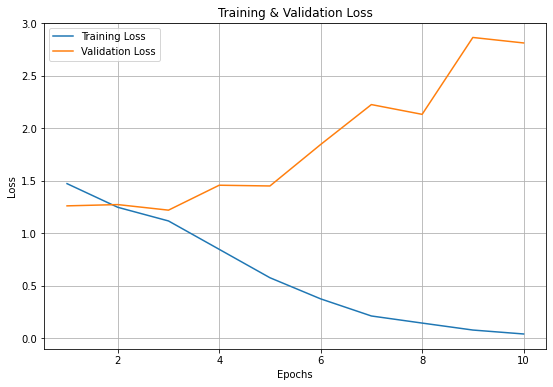

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['loss'])
plt.plot(epochs, History.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

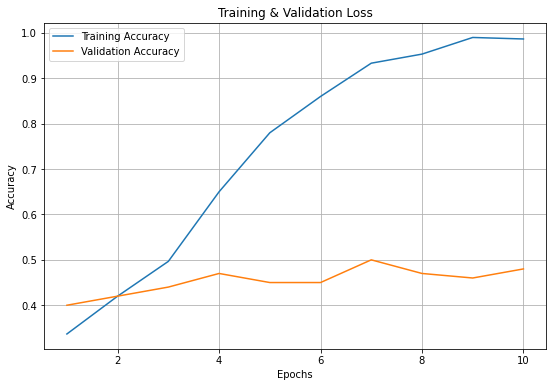

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['accuracy'])
plt.plot(epochs, History.history['val_accuracy'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### 2.1.5 Model Evaluate

In [12]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

13/13 [==============================] - 12s 885ms/step - loss: 2.5496 - accuracy: 0.4500
Loss = 2.54959
Accuracy = 0.45000


### 2.1.6 Model Save

In [13]:
save_dir = 'Models'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

final_model_name = '/' + scale + '_' + model_name + '.h5'

model.save(save_dir + final_model_name)

### 2.1.7 Saved Model Test

In [14]:
from keras.models import load_model

rgb_cnn_lstm = load_model(save_dir + final_model_name)

loss, accuracy = rgb_cnn_lstm.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

13/13 [==============================] - 12s 881ms/step - loss: 2.5496 - accuracy: 0.4500
Loss = 2.54959
Accuracy = 0.45000
